<a href="https://colab.research.google.com/github/livinotami/livinotami.github.io/blob/master/Brian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brianによる神経シミュレーション

Brianは細胞集団レベルでのシミュレーションに向いています。

順番に Shift + Enter を押していくだけで、シミュレーションが可能です。

参考資料

1.公式チュートリアル　https://brian2.readthedocs.io/en/stable/resources/tutorials/index.html

2.Brianで神経活動シミュレーション https://qiita.com/takeajioka/items/11690b9adee612e48b33

## Brianのインストール


In [1]:
!pip install brian2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00


これで、GoogleColab上でBrianが使えるようになりました。(制限時間12時間)

次からは、デモを行います。

## デモ１　神経細胞集団のラスタープロット

In [2]:
import brian2
brian2.start_scope()

In [3]:
# 神経細胞集団の設定
# 100個の細胞にランダムに電位を入力している
N = 100
tau = 10 * brian2.ms #膜時定数
v0 = -50 * brian2.mV #静止膜電位
eqs = '''
dv/dt = (v0-v+I)/tau : volt (unless refractory)
I : volt
'''
G = brian2.NeuronGroup(N, eqs, threshold='v>-40*mV', reset='v=-60*mV', refractory=1*brian2.ms, method='exact')
G.v = -70 * brian2.mV
I_max = 40 * brian2.mV
G.I = 'I_max*rand()'

In [5]:
# モニタ変数を設定
spikemon = brian2.SpikeMonitor(G)

In [6]:
# シミュレーション実行
brian2.run(200*brian2.ms)

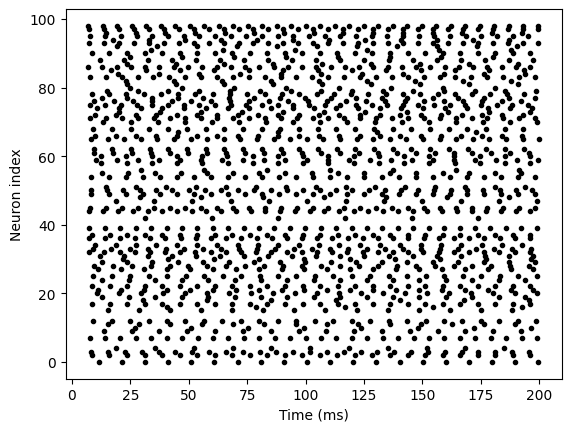

In [7]:
# プロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index');

## デモ２　STDPによる可塑性のシミュレーション

In [22]:
import brian2
brian2.start_scope()

In [23]:
# 神経細胞集団の設定
# 100個の細胞にランダムに電位を入力している
N = 100
tau = 10 * brian2.ms #膜時定数
v0 = -50 * brian2.mV #静止膜電位
eqs = '''
dv/dt = (v0-v+I)/tau : volt (unless refractory)
I : volt
'''
G = brian2.NeuronGroup(N, eqs, threshold='v>-40*mV', reset='v=-60*mV', refractory=1*brian2.ms, method='exact')
G.v = -70 * brian2.mV
I_max = 40 * brian2.mV
G.I = 'I_max*rand()'

In [24]:
# シナプス結合を定義（STDP）
taupre = taupost = 20*brian2.ms
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05
S = brian2.Synapses(G, G,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             v_post += w*3*mV
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(condition='i!=j')

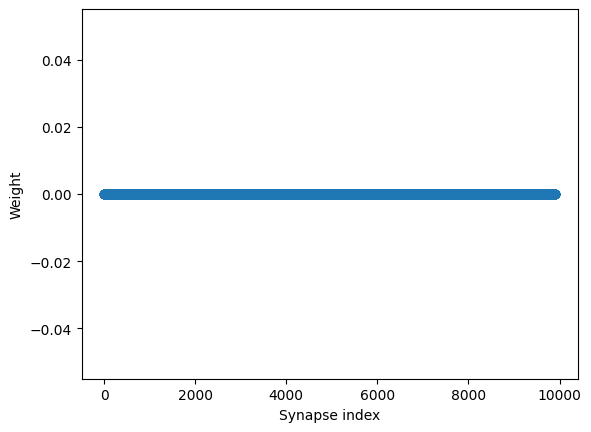

In [25]:
# 最初のシナプス結合
brian2.plot(S.w,'o')
brian2.xlabel('Synapse index')
brian2.ylabel('Weight');

In [26]:
# モニタ変数を設定
spikemon = brian2.SpikeMonitor(G)

In [27]:
# シミュレーション実行
brian2.run(1*brian2.second)

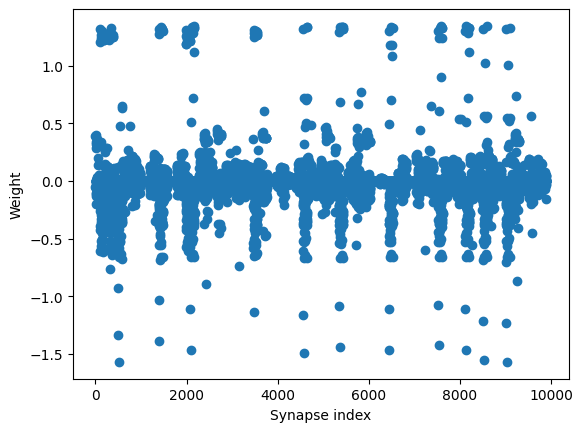

In [28]:
# シミュレーション後のシナプス結合
brian2.plot(S.w,'o')
brian2.xlabel('Synapse index')
brian2.ylabel('Weight');

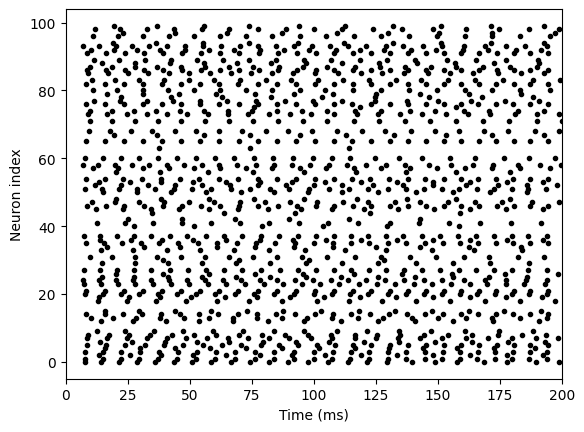

In [29]:
# 初期のプロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index')
brian2.xlim([0, 200]);

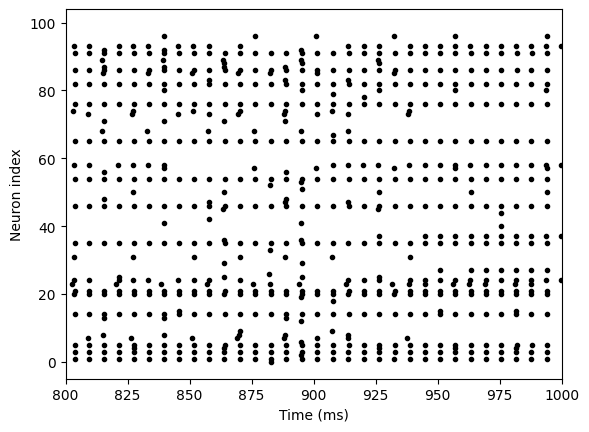

In [30]:
# 最後のプロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index')
brian2.xlim([1000 - 200, 1000]);

シミュレーションによってシナプス結合が形成されるようになりました。

神経活動も変化して同期が見られるようになりました。